In [37]:
# 필요 라이브러리 호출
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

#데이터 로딩 및 인덱스 설정
price_df = pd.read_csv('price_df.csv') # 종목별 Price 시트
price_df = price_df.set_index('Date')
fs_df = pd.read_csv('fs_df.csv') # 종목별 Financial status 시트



In [38]:
# 12개월 수익률, 6개월 수익률 계산
return_12m = price_df.pct_change().rolling(window=12).mean()
return_6m = price_df.pct_change().rolling(window=6).mean()


# #  종목별 가장 최근 수익률 데이터 가져오기
# latest_price = pd.DataFrame({})
latest_returns = pd.DataFrame({
    'Symbol': return_12m.columns,
    '12개월 수익률': return_12m.iloc[-1].values,
    '6개월 수익률': return_6m.iloc[-1].values
})

# 위에서 가져온 종목별 최근 수익률 데이터를  Financial 시트에 병합
fs_df = fs_df.merge(latest_returns[['Symbol', '12개월 수익률', '6개월 수익률']], left_on='Symbol', right_on='Symbol', how='left')

/var/folders/dd/cw0ctdzd5zg5s2r6dn4104fr0000gn/T/ipykernel_3503/1034987548.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  return_12m = price_df.pct_change().rolling(window=12).mean()
/var/folders/dd/cw0ctdzd5zg5s2r6dn4104fr0000gn/T/ipykernel_3503/1034987548.py:3: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  return_6m = price_df.pct_change().rolling(window=6).mean()


In [39]:
# Financial 시트의 각 팩터에 대해서 Z-Score 계산
columns_to_zscore = ['매출총이익/총자산', '영업이익(EBIT)/총자본', 'PER', 'PBR', '12개월 수익률', '6개월 수익률']

for column in columns_to_zscore:
    zscore_column = f'{column}_Z'
    fs_df[zscore_column] = (fs_df[column] - fs_df[column].mean()) / fs_df[column].std()

fs_df


,Symbol,Name,매출총이익(천원),EBIT(천원),수정EPS(원),수정BPS(원),총자산(천원),총자본(천원),매출총이익/총자산,영업이익(EBIT)/총자본,...,PBR,Price,12개월 수익률,6개월 수익률,매출총이익/총자산_Z,영업이익(EBIT)/총자본_Z,PER_Z,PBR_Z,12개월 수익률_Z,6개월 수익률_Z
0,A005930,삼성전자,7.854691e+10,6.566976e+09,2130.74,52002.20,4.559060e+11,3.636779e+11,0.172288,0.018057,...,1.509552,78500,0.030794,0.015365,0.025826,-0.004874,-0.005267,-0.116865,0.605893,0.408634
1,A000660,SK하이닉스,-5.334480e+08,-7.730313e+09,-12517.03,76616.34,1.003302e+11,5.350375e+10,-0.005317,-0.144482,...,1.846865,141500,0.057294,0.036994,-0.921665,-0.062530,-0.034307,-0.042948,1.322923,0.881911
2,A373220,LG에너지솔루션,4.943033e+09,1.486360e+09,5287.09,86327.53,4.543714e+10,2.437351e+10,0.108788,0.060983,...,4.952070,427500,0.004538,-0.035231,-0.312932,0.010353,0.021281,0.637510,-0.104552,-0.698517
3,A207940,삼성바이오로직스,1.802765e+09,1.113680e+09,12050.63,138119.15,1.604620e+10,9.830492e+09,0.112348,0.113288,...,5.502495,760000,-0.005691,0.004614,-0.293940,0.028907,0.010551,0.758127,-0.381357,0.173383
4,A005380,현대차,3.348440e+10,1.512690e+10,43589.08,341738.73,2.824634e+11,1.018094e+11,0.118544,0.148581,...,0.595484,203500,0.027211,0.000459,-0.260886,0.041427,-0.024673,-0.317168,0.508936,0.082456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3679,A950010,평산차업 KDR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,0.000000,0.000000,NaN,NaN,NaN,NaN,-0.227356,0.072413
3680,A950030,네프로아이티,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,0.000000,0.000000,NaN,NaN,NaN,NaN,-0.227356,0.072413
3681,A950070,중국고섬,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,0.000000,0.000000,NaN,NaN,NaN,NaN,-0.227356,0.072413
3682,A950100,SBI모기지,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,0.000000,0.000000,NaN,NaN,NaN,NaN,-0.227356,0.072413


In [40]:
#  매출총이익/총자산', '영업이익(EBIT)/총자본', 'PER', 'PBR' 열의 Z-Score의 경우 Min Max 편차가 심하여 수정된 Z-Score 시용 및 윈저라이징 시행
# '12개월 수익률', '6개월 수익률' 은 기존 Z-Score 그대로 사용 

columns_to_modified_zscore = ['매출총이익/총자산', '영업이익(EBIT)/총자본', 'PER', 'PBR']
for column in columns_to_modified_zscore:
    median = fs_df[column].median()
    mean = fs_df[column].mean()
    modified_zscore_column = f'{column}_Modified_Z'
    fs_df[modified_zscore_column] = (fs_df[column] - mean) / median

    # 아웃라이어 조정을 위한 윈저라이징
    fs_df[modified_zscore_column] = np.where(fs_df[modified_zscore_column] >= 3, 3, fs_df[modified_zscore_column])
    fs_df[modified_zscore_column] = np.where(fs_df[modified_zscore_column] <=-3, -3, fs_df[modified_zscore_column])

fs_df

,Symbol,Name,매출총이익(천원),EBIT(천원),수정EPS(원),수정BPS(원),총자산(천원),총자본(천원),매출총이익/총자산,영업이익(EBIT)/총자본,...,매출총이익/총자산_Z,영업이익(EBIT)/총자본_Z,PER_Z,PBR_Z,12개월 수익률_Z,6개월 수익률_Z,매출총이익/총자산_Modified_Z,영업이익(EBIT)/총자본_Modified_Z,PER_Modified_Z,PBR_Modified_Z
0,A005930,삼성전자,7.854691e+10,6.566976e+09,2130.74,52002.20,4.559060e+11,3.636779e+11,0.172288,0.018057,...,0.025826,-0.004874,-0.005267,-0.116865,0.605893,0.408634,0.038657,-0.376325,-1.357986,-0.487939
1,A000660,SK하이닉스,-5.334480e+08,-7.730313e+09,-12517.03,76616.34,1.003302e+11,5.350375e+10,-0.005317,-0.144482,...,-0.921665,-0.062530,-0.034307,-0.042948,1.322923,0.881911,-1.379558,-3.000000,-3.000000,-0.179317
2,A373220,LG에너지솔루션,4.943033e+09,1.486360e+09,5287.09,86327.53,4.543714e+10,2.437351e+10,0.108788,0.060983,...,-0.312932,0.010353,0.021281,0.637510,-0.104552,-0.698517,-0.468400,0.799462,3.000000,2.661765
3,A207940,삼성바이오로직스,1.802765e+09,1.113680e+09,12050.63,138119.15,1.604620e+10,9.830492e+09,0.112348,0.113288,...,-0.293940,0.028907,0.010551,0.758127,-0.381357,0.173383,-0.439972,2.232187,2.720133,3.000000
4,A005380,현대차,3.348440e+10,1.512690e+10,43589.08,341738.73,2.824634e+11,1.018094e+11,0.118544,0.148581,...,-0.260886,0.041427,-0.024673,-0.317168,0.508936,0.082456,-0.390497,3.000000,-3.000000,-1.324257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3679,A950010,평산차업 KDR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.227356,0.072413,NaN,NaN,NaN,NaN
3680,A950030,네프로아이티,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.227356,0.072413,NaN,NaN,NaN,NaN
3681,A950070,중국고섬,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.227356,0.072413,NaN,NaN,NaN,NaN
3682,A950100,SBI모기지,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.227356,0.072413,NaN,NaN,NaN,NaN


In [41]:
# 카테고리별 Z-Score  및 종합 Z-스코어 계산
fs_df['퀄리티 Z-Score'] = (fs_df['매출총이익/총자산_Modified_Z'] + fs_df['영업이익(EBIT)/총자본_Modified_Z']) / 2
fs_df['밸류 Z-Score'] = (fs_df['PER_Modified_Z'] + fs_df['PBR_Modified_Z']) / 2
fs_df['모멘텀 Z-Score'] = (fs_df['12개월 수익률_Z'] + fs_df['6개월 수익률_Z']) / 2

# 밸류 Z-Score의 경우 -1을 곱하여 높을수록 부정적 기여를 하는 것으로 조정
fs_df['Total Z-Score'] = (fs_df['퀄리티 Z-Score'] + -1 * fs_df['밸류 Z-Score'] + fs_df['모멘텀 Z-Score']) / 3


In [42]:
# 종합 Z-스코어 기준 Top30 종목 선정
top_30_stocks = fs_df.nlargest(30, 'Total Z-Score')
top_30_stocks

,Symbol,Name,매출총이익(천원),EBIT(천원),수정EPS(원),수정BPS(원),총자산(천원),총자본(천원),매출총이익/총자산,영업이익(EBIT)/총자본,...,12개월 수익률_Z,6개월 수익률_Z,매출총이익/총자산_Modified_Z,영업이익(EBIT)/총자본_Modified_Z,PER_Modified_Z,PBR_Modified_Z,퀄리티 Z-Score,밸류 Z-Score,모멘텀 Z-Score,Total Z-Score
971,A321820,아티스트유나이티드,8.997934e+06,-3.277590e+06,-689.12,2115.20,6.122541e+07,2.850548e+07,0.146964,-0.114981,...,12.024542,19.684511,-0.163558,-3.000000,-3.000000,3.000000,-1.581779,0.000000,15.854526,4.757583
404,A290690,소룩스,1.088248e+07,5.155975e+05,-247.90,2130.56,1.601674e+08,6.242133e+07,0.067944,0.008260,...,9.488481,5.956704,-0.794549,-0.644683,-3.000000,-0.144900,-0.719616,-1.572450,7.722592,2.858476
901,A091440,한울소재과학,8.546442e+06,-4.053332e+06,-537.32,1576.43,4.292915e+07,2.234452e+07,0.199082,-0.181402,...,7.783551,11.966324,0.252621,-3.000000,-3.000000,3.000000,-1.373690,0.000000,9.874938,2.833749
1108,A017370,우신시스템,3.722062e+07,1.241019e+07,405.74,5732.99,3.804605e+08,9.640371e+07,0.097830,0.128731,...,3.854537,6.197378,-0.555901,2.655196,-3.000000,-0.458294,1.049647,-1.729147,5.025957,2.601584
1053,A010100,한국무브넥스,1.445630e+08,5.933779e+07,1549.19,10709.72,8.747248e+08,3.411806e+08,0.165267,0.173919,...,3.161846,4.285797,-0.017406,3.000000,-3.000000,-1.078000,1.491297,-2.039000,3.723821,2.418040
293,A080220,제주반도체,3.761711e+07,1.783843e+07,485.58,4676.07,1.986734e+08,1.585684e+08,0.189341,0.112497,...,4.072984,5.570438,0.174836,2.210504,-2.699649,0.811515,1.192670,-0.944067,4.821711,2.319483
397,A018290,브이티,1.398985e+08,4.554661e+07,775.51,3992.80,2.566247e+08,1.473167e+08,0.545148,0.309175,...,3.175234,2.801094,3.000000,3.000000,-3.000000,1.870603,3.000000,-0.564699,2.988164,2.184288
1046,A099440,스맥,4.451428e+07,2.203585e+07,414.49,3196.28,2.073504e+08,1.068075e+08,0.214681,0.206314,...,2.561079,3.442887,0.377182,3.000000,-3.000000,-0.666832,1.688591,-1.833416,3.001983,2.174663
45,A047050,포스코인터내셔널,1.839534e+09,1.163112e+09,3833.71,34858.60,1.661775e+10,6.624762e+09,0.110697,0.175570,...,3.409217,3.631235,-0.453159,3.000000,-3.000000,-0.231263,1.273420,-1.615632,3.520226,2.136426
325,A001060,JW중외제약,3.355424e+08,1.003038e+08,1478.02,11090.75,6.450388e+08,2.654405e+08,0.520189,0.377877,...,2.085228,2.932776,2.816739,3.000000,-3.000000,1.063640,2.908369,-0.968180,2.509002,2.128517


In [43]:
# 선정된 Top30 종목의 최근 12개월 수익률 계산
top_30_stocks_symbol = top_30_stocks['Symbol'].tolist()
price_df_top30 = price_df[top_30_stocks_symbol]
returns_top30 = price_df_top30.pct_change(1)
returns_top30 = returns_top30.tail(12)
returns_top30

/var/folders/dd/cw0ctdzd5zg5s2r6dn4104fr0000gn/T/ipykernel_3503/534944432.py:4: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns_top30 = price_df_top30.pct_change(1)


,A321820,A290690,A091440,A017370,A010100,A080220,A018290,A099440,A047050,A001060,...,A003230,A204620,A257720,A058970,A243070,A094360,A041190,A053080,A005180,A007980
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-31,0.441176,0.088993,0.426799,0.129687,0.037037,0.134078,0.085714,0.140805,0.037611,0.056099,...,-0.032283,0.096405,0.152749,0.400000,0.006861,0.115603,0.394667,0.101399,0.050955,0.034985
2023-02-28,-0.049745,0.027957,-0.206957,0.024896,0.016071,0.174877,-0.047368,0.105793,-0.036247,0.042074,...,-0.029292,0.019374,0.349823,0.203150,0.149915,0.303242,-0.089866,0.071958,0.016970,-0.030986
2023-03-31,-0.245638,0.010460,0.116228,-0.047233,-0.049209,0.218029,0.128913,0.047836,-0.013274,0.027153,...,-0.000838,0.122807,-0.113874,1.496614,-0.060741,0.139024,-0.032563,0.107601,-0.009535,-0.077907
2023-04-30,0.080071,-0.037267,-0.202358,-0.185552,0.168207,-0.202238,-0.048940,0.004348,0.201794,0.093996,...,-0.023490,0.029948,-0.069424,0.094033,0.033123,-0.079229,-0.117264,-0.133690,0.069795,-0.046658
2023-05-31,-0.065898,2.468817,0.184729,0.154783,0.142405,0.128371,0.077187,0.077922,0.123134,0.019807,...,-0.071306,-0.031606,0.800000,-0.094215,-0.025954,0.293023,0.003690,0.016461,0.091114,0.008598
2023-06-30,-0.104056,0.136392,-0.027027,0.054217,0.033241,-0.053537,0.565287,-0.064257,0.323920,0.002158,...,-0.010176,0.023499,0.250441,-0.051095,-0.007837,0.131295,0.013480,0.114372,-0.019588,0.204590
2023-07-31,-0.206693,-0.327878,-0.123932,1.648571,0.557641,-0.085859,-0.125127,-0.141631,1.260979,0.831905,...,0.130841,-0.061224,0.057828,0.559615,0.022117,0.260731,-0.142684,1.093551,-0.033649,-0.105063
2023-08-31,0.071960,-0.062500,0.263415,0.087379,-0.148021,-0.020994,0.508140,0.635000,-0.120977,0.083531,...,0.606612,0.817935,0.104000,0.064118,0.459042,-0.116015,-0.011283,0.201735,0.212187,0.322993
2023-09-30,-0.240741,0.037229,-0.115830,-0.275794,0.286869,-0.079007,0.565150,0.550459,-0.098485,-0.168309,...,0.039095,0.013453,0.129227,-0.224797,-0.074153,0.048502,-0.101284,-0.048736,0.000000,-0.204138


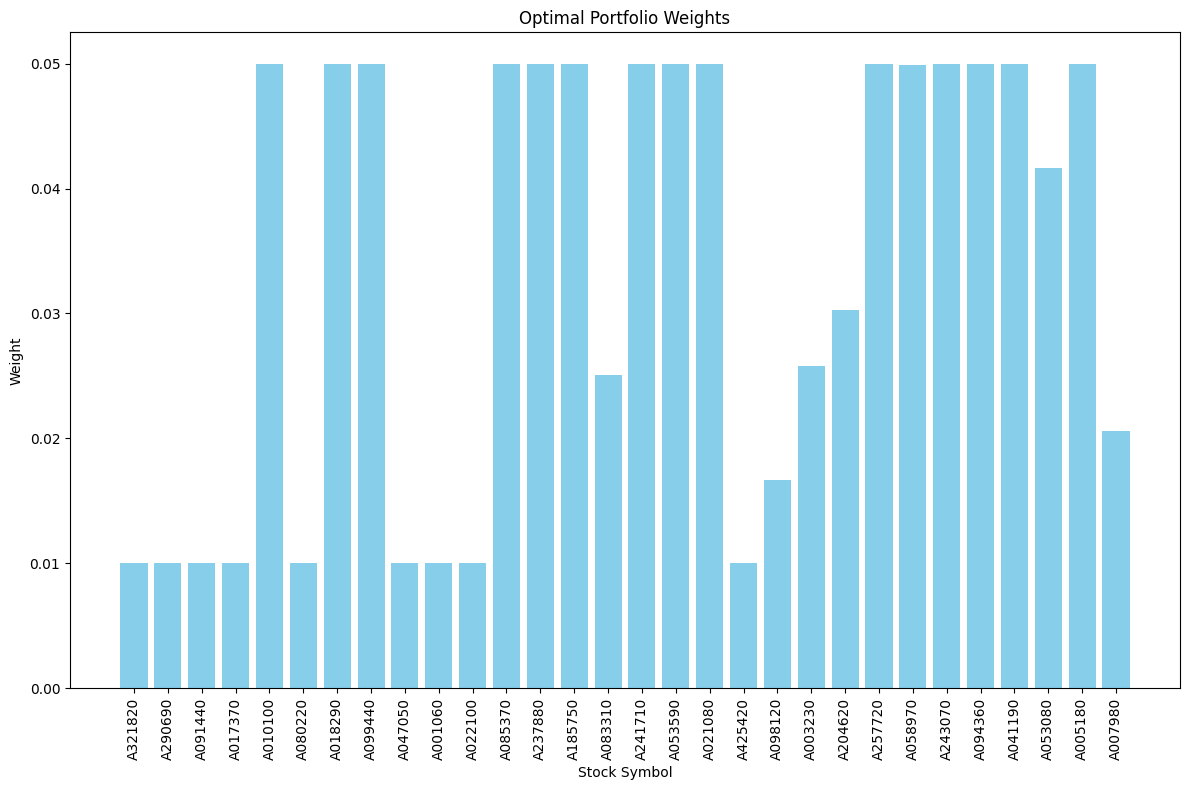

,Name,Symbol,Weight
971,아티스트유나이티드,A321820,0.010000
404,소룩스,A290690,0.010000
901,한울소재과학,A091440,0.010000
1108,우신시스템,A017370,0.010000
1053,한국무브넥스,A010100,0.050000
293,제주반도체,A080220,0.010000
397,브이티,A018290,0.050000
1046,스맥,A099440,0.050000
45,포스코인터내셔널,A047050,0.010000
325,JW중외제약,A001060,0.010000


In [44]:
# 최근 12개월 수익률을 사용한 공분산 행렬 계산
cov_matrix = returns_top30.cov()

# 포트폴리오 분산을 최소화하기위한 함수 정의
def portfolio_variance(weights, cov_matrix):
    return weights.T @ cov_matrix @ weights

# 포트폴리오 비중 제약조건 설정 : 최소 1%, 최대 5% 투자
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = [(0.01, 0.05) for _ in range(len(top_30_stocks_symbol))]

# 초기 가중치 추정값
initial_guess = np.array([1/len(top_30_stocks_symbol)] * len(top_30_stocks_symbol))

# 포트폴리오 최적화 (최소 분산)
result = minimize(portfolio_variance, initial_guess, args=(cov_matrix,), bounds=bounds, constraints=constraints)

# 최적의 가중치 가져오기
optimal_weights = result.x

# 결과를 데이터프레임으로 생성
portfolio_weights = pd.DataFrame({
    'Name' :  top_30_stocks['Name'],
    'Symbol': top_30_stocks_symbol,
    'Weight': optimal_weights
})


# 최적 포트폴리오 가중치 차트 시각화
plt.figure(figsize=(12, 8))
plt.bar(portfolio_weights['Symbol'], portfolio_weights['Weight'], color='skyblue')
plt.xlabel('Stock Symbol')
plt.ylabel('Weight')
plt.title('Optimal Portfolio Weights')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

portfolio_weights